# Introductory applied machine learning (INFR10069)

# Assignment 4: Feature Engineering

## Marking Breakdown

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.


## Mechanics

You should produce a Jupyter notebook in answer to this assignment.
**You need to submit this notebook electronically as described below.**

Place your notebook in a directory called `iamlans` and submit this directory using the submit command on a DICE machine. The format is:

`submit iaml 4 iamlans`

You can check the status of your submissions with the `show_submissions` command.

**Late submissions:** The policy stated in the School of Informatics MSc Degree Guide is that normally you will not be allowed to submit coursework late. See http://www.inf.ed.ac.uk/teaching/years/msc/courseguide10.html#exam for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).

# Student Discussion Notes
The students that I have discussed the assignment with are Lefteris Manousakis, Yova Kemenchedjieva, and Mark Anderson

## Important Instructions

1. In the following questions you are asked to run experiments using Python (version 2.7) and the following packages:
    * Numpy
    * Pandas
    * Scikit-learn 0.17
    * Matplotlib
    * Seaborn

2. Before you start make sure you have set up a vitual environment (or conda environment if you are working on your own machine) and the required packages installed. Instructions on how to set-up the working enviornment and install the required packages can be found in `01_Lab_1_Introduction`.

3. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers. **You are welcome to split your answer into multiple cells with intermediate printing.**

4. The .csv files that you will be using are located at `./datasets` (the `datasets` directory is adjacent to this file).

5. **IMPORTANT:** Keep your answers brief and concise. Most questions can be answered with 2-3 lines of explanation (excluding coding questions), unless stated otherwise.

## Imports

In this assignment you are asked to import all the packages and modules you will need. Include all required imports and execute the cell below.

In [1]:
from __future__ import print_function, division
%matplotlib inline

In [2]:
# Your code goes here
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.cross_validation import KFold

/home/dsmarda/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Description of the datasets


This assignment is based on two datasets:
1. the 20 Newsgroups Dataset (you should recognise it from Assignment 1)
2. the MNIST digits dataset

### 20 Newsgroups

For convenience, we repeat the description here. This dataset is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups, each corresponding to a different topic. Some of the newsgroups are very closely related to each other (e.g. comp.sys.ibm.pc.hardware, comp.sys.mac.hardware), while others are highly unrelated (e.g misc.forsale, soc.religion.christian). 

To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We will use documents from only 5 out of the 20 newsgroups, which results in a 5-class problem. More specifically the 5 classes correspond to the following newsgroups: 
1. `alt.atheism`
2. `comp.sys.ibm.pc.hardware`
3. `comp.sys.mac.hardware`
4. `rec.sport.baseball`
5. `rec.sport.hockey `

However, note here that classes 2-3 and 4-5 are rather closely related.

**In contrast to Assignment 1**, we have opted to use tf-idf weights ([term frequency - inverse document frequency](https://en.wikipedia.org/wiki/Tf%E2%80%93idf))
for each word instead of the frequency counts. These weights represent the importance of a word to a
document with respect to a collection of documents. The importance increases proportionally to the number
of times a word appears in the document and decreases proportionally to the number of times the word
appears in the whole corpus. 

Additionally we preprocess the data to include the most frequent 1000 words that are in greater than 2 documents, less than half of all documents, and that are not [stop words](https://en.wikipedia.org/wiki/Stop_words).

We will perform all this preprocessing for you.


### MNIST
This MNIST Dataset is a collection handwritten digits. The samples are partitioned (nearly) evenly across the 10 different digit classes {0, 1, . . . , 9}. We use a preprocessed version for which the data are $8 \times 8$ pixel images containing one digit each. For further details on how the digits are preprocessed, see the sklearn documentation. The images are grayscale, with each pixel taking values in {0, 1, . . . , 16}, where 0 corresponds to black (weakest intensity) and 16 corresponds to white (strongest intensity). Therefore, the dataset is a N × 64
dimensional matrix where each dimension corresponds to a pixel from the image and N is the number of
images. 

Again, to save you time, we perfom the import for you.

## 1. Clustering the 20 Newsgroups Data [50%]

In part 1 we will cluster the observations in the 20 Newsgroups dataset using the k-means algorithm. Each row of the dataset represents a document with bag of words features. If we were not given the labels for each document (i.e. the newsgroup it came from), clustering could allow us to infer which documents should have the same label. Observing common words within each cluster may allow us to give meaning to these inferred labels too.

First we'll import the data and fit and evaluate k-means with 5 cluster centres. Next, we will try and infer which cluster corresponds with which label. Finally, we will pretend we don't know the number of clusters there should be, as is the normal scenario with large unlabeled data, and investigate the effect of using a different number of cluster centres (i.e. varying `k`).

### ========== Question 1.0 ==========

Run the below cells to import the data. It would be a good idea to understand the code but it's not strictly necessary (see the [sklearn documentation](http://scikit-learn.org/0.17/datasets/index.html#the-20-newsgroups-text-dataset)).

*This may take a wee while as it will download the dataset*

**Do not change any of the code in this question**

In [3]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np

cats = ['alt.atheism', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 
        'rec.sport.baseball', 'rec.sport.hockey']
newsgroups_train = fetch_20newsgroups(subset='train', categories=cats, 
                                      remove=('headers', 'footers', 'quotes'))
vectorizer = TfidfVectorizer(max_df=0.5, max_features=1000,
                             min_df=2, stop_words='english', 
                             token_pattern='(?u)\\b[A-z]{2,}\\b')
X_sparse = vectorizer.fit_transform(newsgroups_train.data)
y_num = newsgroups_train.target
X = pd.DataFrame(X_sparse.todense(), columns=vectorizer.get_feature_names())
y = np.array(cats)[y_num]

### ========== Question 1.1 ==========

Perform an initial inspection of the data, X and y (no more than 5 lines of code). Below the code, describe what the data are i.e. what the objects are, and what they represent (fewer than 4 sentences).

In [4]:
# Your code goes here
print ("Type of X:", type(X), ";  Shape of X:", X.shape)
print ("Type of y:", type(y), ";  Shape of y:", y.shape)
X.describe()

Type of X: <class 'pandas.core.frame.DataFrame'> ;  Shape of X: (2845, 1000)
Type of y: <class 'numpy.ndarray'> ;  Shape of y: (2845,)


,abc,ability,able,ac,accept,access,according,acquired,actually,adaptec,...,written,wrong,yankees,yeah,year,years,yes,york,young,zone
count,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,...,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000
mean,0.002436,0.002149,0.006709,0.001454,0.002286,0.003953,0.003115,0.000921,0.008366,0.001816,...,0.002612,0.006811,0.002470,0.003564,0.016934,0.008797,0.006381,0.002772,0.003288,0.001626
std,0.030224,0.020739,0.034631,0.023100,0.021634,0.030111,0.026958,0.016275,0.043921,0.026026,...,0.026988,0.039172,0.032786,0.031238,0.061181,0.039346,0.037319,0.025381,0.030929,0.022175
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.723914,0.420916,0.431380,0.519765,0.443354,0.663808,0.572124,0.413233,1.000000,0.578282,...,0.723081,0.568146,0.878185,0.693531,0.650649,0.455493,0.646447,0.572455,0.703771,0.605576


*Your answer goes here*
X is a pandas dataframe with each instance being an article and each dimension being a different word in a bag-of-words-esque representation that has been transformed with the tf-idf vectorizer. Each value for an instance is a tf-idf value that represents the presence and importance of a word in the article. y is a numpy 1-D ndarray that has the same number of instances as the pandas dataframe and it contains the labels of each of the articles in X. 

### ========== Question 1.2 ==========

Initialise a [k-means clustering](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) object with 5 clusters. Make sure that you can reproduce your results exactly. *Hint: there is an argument for this*. You need only set two arguments; others can be kept as default. Call the instantiated object `kmeans`. Use the `fit()` method to fit to the training data (X imported above)

In [5]:
# Your code goes here
kmeans = KMeans(n_clusters=5, random_state=1)  
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

### ========== Question 1.3 ==========

Evauate the quality of this fit.

1. Get a feel for the average distance of a data point from the centre: print the mean of the euclidean distances of all data points from the mean data point (in the whole dataset)
1. print the inertia of the model. *Hint: check the properties of the kmeans object*
1. print the adjusted rand index of the model. *Hint: `adjusted_rand_score`*

Below the code: 
1. Define what the inertia and adjusted rand score are (one or two sentences). *Hint: check [sklearn documentation](http://scikit-learn.org/stable/modules/clustering.html)*
1. Comment on the quality of the clustering implied by the adjusted rand score and inertia

In [6]:
# Your code goes here
print ("Mean of euclidean distances:", np.mean(np.linalg.norm(X-X.mean(), axis=0)))
print ("Inertia:", kmeans.inertia_)
print ("Adjusted Rand Index:", adjusted_rand_score(y, kmeans.labels_))

Mean of euclidean distances: 1.5568200597
Inertia: 2593.16607181
Adjusted Rand Index: 0.225286152468


*Your answer goes here*
1. The inertia as defined on the sklearn documentation is the sum of the distances of the samples to their closest cluster center. The adjusted rand score, given true and predicted labels measures how similar two clusterings are by comparing pairs of points and determining if they are in the same or different clusters in the true clusterings and predicted clusterings, normalizing for chance over the maximum raw index.
2. Without any clustering, the intertia would be 1.55 units per point * 2845 points, which is over 4000. The fact that the intertia is substantially smaller than this suggests that the clustering helped cluster the model but the fact that it is above 2500 suggests it could be further improved. For the Adjusted Rand Index (ARI), 1.0 corresponds to perfect matches between the predicted and true clusterings while 0 suggests random labelling. Given that the ARI can be less than zero, the fact that the ARI is positive suggests that it is better than random labelling. That being said, 0.2 is only slightly better than 0 and could certainly be improved.

### ========== Question 1.4 ==========

Print:
1. the number of datapoints with each label
2. the number of datapoints assigned to each cluster. *Hint: you should use the properties of the kmeans object you just fit.* 

Below the code, comment on the distribution of datapoints to cluster centres.

In [7]:
# Your code goes here
print ("Labels of datapoints:\n", pd.Series(y).value_counts())
print ()
print ("Datapoints assigned to each cluster:\n", pd.Series(kmeans.labels_).value_counts())


Labels of datapoints:
 rec.sport.hockey            600
rec.sport.baseball          597
comp.sys.ibm.pc.hardware    590
comp.sys.mac.hardware       578
alt.atheism                 480
dtype: int64

Datapoints assigned to each cluster:
 4    1025
3     642
0     620
2     355
1     203
dtype: int64


*Your answer goes here*
The labels of the datapoints in the original dataset are reasonably evenly distributed, with the smallest group containing 480 instances and the largest group containing 600 instances. The datapoints are much less evenly spread out across the clusters, with the largest cluster containing over a third of the data and the smallest containing less than one tenth.

### ========== Question 1.5 ==========

We can't visualise these cluster centres directly, since they are 1000 dimensional. However, we can at least measure the distance between each centre. Create a distance matrix such that the entry with index (i,j) shows the distance between centre i and j. *Hint: again you should use the properties of the kmeans object you just fit.*

In [8]:
# Your code goes here
distanceMatrix = np.zeros((5,5))
for i in range(5):
    for j in range(5):
        distanceMatrix[i,j] = np.linalg.norm(kmeans.cluster_centers_[i] - kmeans.cluster_centers_[j])
print (distanceMatrix)

[[ 0.          0.33432147  0.28736478  0.29174244  0.1921123 ]
 [ 0.33432147  0.          0.41130415  0.41349586  0.35037844]
 [ 0.28736478  0.41130415  0.          0.28255381  0.22249099]
 [ 0.29174244  0.41349586  0.28255381  0.          0.20279782]
 [ 0.1921123   0.35037844  0.22249099  0.20279782  0.        ]]


### ========== Question 1.6 ==========

For each cluster centre label, plot the counts of the true labels. The cluster labels are a property of the k-means object, the true labels are contained in `y`. Make sure that you label the plot axes and legend clearly. Below the code, comment on the quality of the fit. *Hint: you can do the main plot (without labels) in one line with seaborn (you're free to do it as you like though!).*

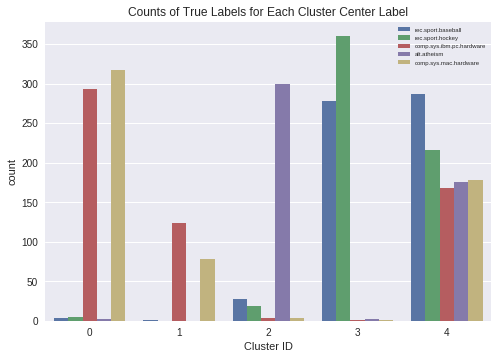

In [9]:
# Your code goes here
ax = sns.countplot(x=kmeans.labels_, hue=y)
plt.xlabel("Cluster ID")
plt.title("Counts of True Labels for Each Cluster Center Label")
plt.legend(fontsize=6)
plt.show()

*Your answers goes here*
The quality of the fit is reasonably poor; only cluster 0 contains nearly strictly one label type (alt.atheism). However, each of the places that the clustering algorithm got "confused" could be predicted. Clusters 1 and 4 both have essentially exclusively datapoints labeled as comp.sys but the clustering algorithm had difficulty distinguishing between the two. Similarly, cluster 3 had nearly exclusively datapoints labelled with rec.sport. Cluster 2 has a nearly even split of labels so it appears that cluster 2 likely contains the most confusing or non-unique datapoints from all labels.

### ========== Question 1.7 ==========

We will now investigate using dimensionality reduction to try and improve the quality of the fit. Use the sklearn implementation of [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) and its method `fit_transform()` to create a reduced reduced dataset for `n_components` = [1,2,3,5,10,20,50,100,500,1000] i.e. create datasets that are of shape `(N, d)` for `d` in `n_components`. Fit k-means to each reduced dataset and report the `inertia` and `adjusted_rand_score` for each iteration.

Plot `adjusted_rand_score` against number of principal components (label graph). Use a log scale on the x axis. Below the graph:
1. describe what it shows
1. explain why we cannot use inertia to choose the best number of principal components
1. explain why dimensionality reduction could help k-means perform better

In [10]:
# Your code goes here
n_components = [1,2,3,5,10,20,50,100,500,1000]
# This list will hold the rand scores for later plotting
rand_scores = []
for n in n_components:
    reducedX = PCA(n_components=n).fit_transform(X)
    reducedkmeans = KMeans(n_clusters=5, random_state=1).fit(reducedX)
    print ("{} components...".format(n))
    print ("Inertia:", reducedkmeans.inertia_)
    print ("Adjusted Rand Index:", adjusted_rand_score(y, reducedkmeans.labels_))
    rand_scores.append(adjusted_rand_score(y,reducedkmeans.labels_))

1 components...
Inertia: 2.82090492382
Adjusted Rand Index: 0.210249116452
2 components...
Inertia: 10.5755735754
Adjusted Rand Index: 0.268026862664
3 components...
Inertia: 20.4227145483
Adjusted Rand Index: 0.23950491788
5 components...
Inertia: 49.9040565511
Adjusted Rand Index: 0.228953695374
10 components...
Inertia: 117.879044598
Adjusted Rand Index: 0.216656558089
20 components...
Inertia: 230.904116573
Adjusted Rand Index: 0.209434137736
50 components...
Inertia: 489.245201985
Adjusted Rand Index: 0.218995001807
100 components...
Inertia: 800.156874844
Adjusted Rand Index: 0.210263810348
500 components...
Inertia: 2132.00770486
Adjusted Rand Index: 0.205100236945
1000 components...
Inertia: 2593.26308255
Adjusted Rand Index: 0.268686397084


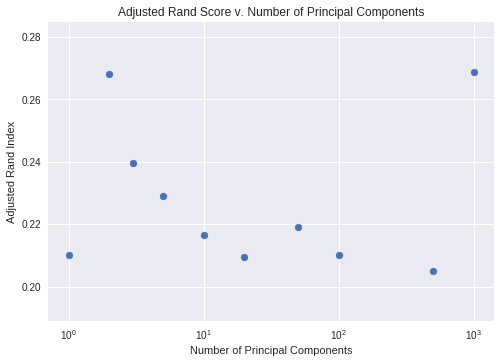

In [11]:
# Q 1.7 Plotting
plt.scatter(x=n_components, y=rand_scores)
plt.semilogx()
plt.xlabel("Number of Principal Components")
plt.ylabel("Adjusted Rand Index")
plt.title("Adjusted Rand Score v. Number of Principal Components")
plt.show()

*Your answer goes here*
1. The graph shows that if we are using PCA, an analysis with 2 components yields clusters most similar to the preassigned labels on the dataset.
2. We cannot use inertia to choose the best number of principal components because inertia is a function of both the quality of the data and the number of components. By nature of how intertia is mathematically calculated, the inertia will increase as we add dimensions and could increase even when the fit is improved. This is similar to how the R^2 value in linear regression will increase when we increase the number of datapoints even if the new points are not on the predicted line.
3. For our kmeans algorithm we have been using Euclidean distances. At large dimensionalities, euclidean distances become less meaningful for differentiating datapoints. To account for this we could have used a different distance measure rather than Euclidean distances but dimensionality reduction also works. Also worth noting is that kmeans treats all dimensions equally whereas dimensional reduction tries to identify the most important attributes.

### ========== Question 1.8 ==========

1. So we can visualise the data, create X_2d: the dataset X transformed down to 2 principal component dimensions. Use sklearn's implementation of [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) and its method `fit_transform()` to do this (as above). 

1. Create a new k-means object, `kmeans_pca`, and fit the 2d data to it. Show the adjusted rand score.

1. As above, for each cluster centre label, plot the counts of the true labels. The cluster labels are a property of the k-means object, the true labels are contained in `y`. Make sure that you label the plot axes and legend clearly. Print below it the number of data points each cluster is responsible for.

1. Finally, below the plot, comment on the difference between these clusters and the clusters on the 1000 dimensional data with respect to the distribution of the labels in each. Are they better?

Adjusted Rand Index: 0.267121999192


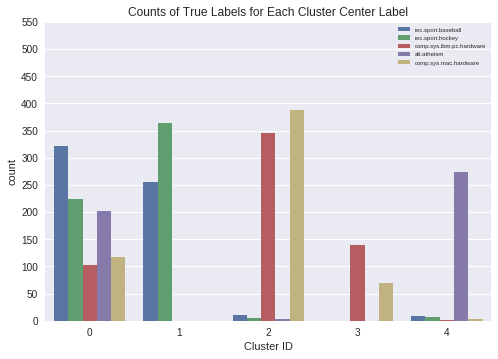

Datapoints assigned to each cluster:
 0    969
2    752
1    620
4    295
3    209
dtype: int64


In [12]:
# Your code goes here
X_2d = PCA(n_components=2).fit_transform(X)
kmeans_pca = KMeans(n_clusters=5, random_state=1).fit(X_2d)
print ("Adjusted Rand Index:", adjusted_rand_score(y, kmeans_pca.labels_))

ax = sns.countplot(x=kmeans_pca.labels_, hue=y)
plt.xlabel("Cluster ID")
plt.yticks(range(0,600,50))
plt.title("Counts of True Labels for Each Cluster Center Label")
plt.legend(fontsize=6)
plt.show()
print ("Datapoints assigned to each cluster:\n", pd.Series(kmeans_pca.labels_).value_counts())

*Your answer goes here*
The largest cluster in the new set of clusters has less datapoints than the largest in the original set of clusters. The shape of the cluster with the most confusion (cluster 3 in the chart above) has changed shape slightly as there is now less comp.sys instances in the cluster. In other words, the clustering is now more certain of what differentiates the instances with one of the two comp.sys labels from those with the other 3 labels. Similarly, clusters 0 and 1 are more defined than their corresponding clusters in 1.6. Otherwise, the two clusterings are actually very similar (more similarities than differences). Both sets have 2 classes which have mostly a mix of comp.sys articles, one that has mostly rec.sport articles, and one that is almost entirely atheism classes. 

### ========== Question 1.9 ==========

Given the above plot, apply a label to each cluster centre. Create a new vector, `labels_interp`, which is the same as `kmeans.labels_`, but instead of numbers, the interpreted label of the cluster centre. For example, if you decided cluster 0 was 'apples', 1 was 'pears', 2 was 'stairs', and `kmeans.labels_` was `[2, 0, 1, 1, 0]`, create  `labels_interp = ['stairs', 'apples', 'pears', 'pears', 'apples']`. Hint: an example of how to do this is given in the last line of Question 1.0.

**N.B. be careful to use the `kmeans_pca` object you created above, not the first kmeans object you made**

In [13]:
# Your code goes here
# Dict used instead of list mainly so code is easier to read/interpret
label_dict = {0:"rec.sport.hockey", 1:"comp.sys.ibm.pc.hardware", 2:"alt.atheism", 3:"rec.sport.baseball", 4:"comp.sys.mac.hardware"}
print (len(kmeans_pca.labels_))
print (len(label_dict.values()))
print (kmeans_pca.labels_)
#labels_interp = np.array#[kmeans_pca.labels_]
templist = []
for i in range (len(kmeans_pca.labels_)):
    templist.append(label_dict[kmeans_pca.labels_[i]])
labels_interp = np.array(templist)
print (labels_interp)

2845
5
[0 1 1 ..., 3 1 0]
['rec.sport.hockey' 'comp.sys.ibm.pc.hardware' 'comp.sys.ibm.pc.hardware'
 ..., 'rec.sport.baseball' 'comp.sys.ibm.pc.hardware' 'rec.sport.hockey']


### ========== Question 1.10 ==========

Produce a normalised (by true label) confusion matrix of your interpreted labels from the k-means clustering and the true labels. As usual, you may use any functions from previous assignments or labs. Clearly label the axes of the plot. Check that these confusions correlate with your expectations! N.B. this is just a slightly different way of interpreting the information in the count plot above (focussed this time on the true labels).

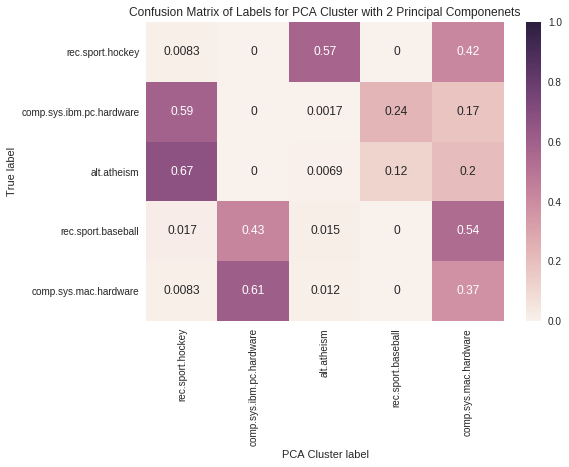

In [14]:
# Your code goes here
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('PCA Cluster label')
    
cm = confusion_matrix(y_true=y, y_pred=labels_interp)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plot_confusion_matrix(cm_norm, classes=list(label_dict.values()), title="Confusion Matrix of Labels for PCA Cluster with 2 Principal Componenets")

### ========== Question 1.11 ==========

Since we are now in 2 dimensions, let's visualise the data, the cluster centres, and the decision boundaries via a [Voronoi_diagram](https://en.wikipedia.org/wiki/Voronoi_diagram). You'll essentially be able to copy and paste the code from the [sklearn kmeans digits example](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) and edit a few bits to get over half marks.

Clearly mark each cluster centre.

For full marks, additionally:
* label each cluster centre with the inferred cluster label
* create a second plot which clearly shows where the true classes lie within the pca space e.g. the [sklearn PCA example here](http://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html)

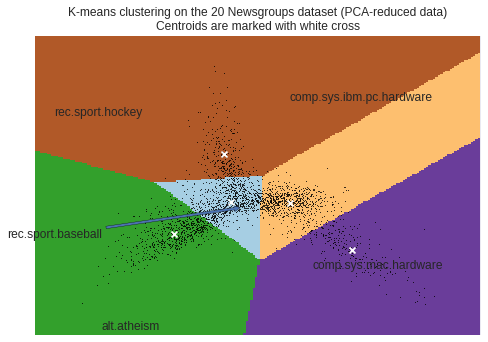

In [15]:
# Your code goes here
# Changes from the pasted sklearn code:
# 1. replace cases of "reduced_data" with "X_2d"
# 2. replace cases of "kmeans" with "kmeans_pca"
# 3. Changed x_min...y_max for better plot visualization
# 4. Annotations added
# 5. Step size decreased for clearer decision boundaries

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .005     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X_2d[:, 0].min() - .1, X_2d[:, 0].max() + .1
y_min, y_max = X_2d[:, 1].min() - .1, X_2d[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans_pca.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

# Annotate each section of Voronoi Diagram
plt.annotate(s="rec.sport.hockey", xy=[-.4,.4], xytext=[-.4,.3])
plt.annotate(s="comp.sys.ibm.pc.hardware", xy=[.4,.4], xytext=[.1,.35])
plt.annotate(s="alt.atheism", xy=[-.2, -.4], xytext=[-.3,-.4])
plt.annotate(s="comp.sys.mac.hardware", xy=[.4,-.2], xytext=[.15,-.2])
plt.annotate(s="rec.sport.baseball", xy=[0,0], xytext = [-.5, -.1], arrowprops={"arrowstyle":"simple"})

plt.plot(X_2d[:, 0], X_2d[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans_pca.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=35, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the 20 Newsgroups dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

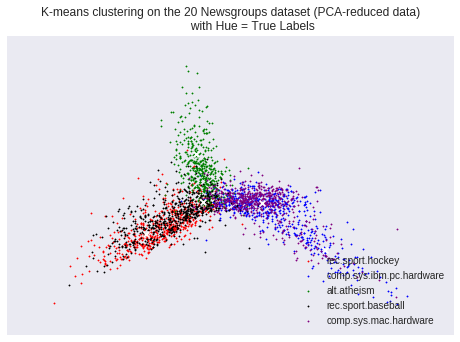

In [16]:
# Second Plot showing True Labels
# Essentially a mix of the two examples linked in the instructions

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .005     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X_2d[:, 0].min() - .1, X_2d[:, 0].max() + .1
y_min, y_max = X_2d[:, 1].min() - .1, X_2d[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans_pca.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
colors = ["red", "blue", "green", "black", "purple"]
for color, i, target_name in zip(colors, [0,1,2,3,4], label_dict.values()):
    plt.scatter(X_2d[y==target_name, 0], X_2d[y==target_name, 1], color=color, label=target_name, s=2)
# Plot the centroids as a white X
centroids = kmeans_pca.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=35, linewidths=3,
            color='w', zorder=10)
plt.legend(loc="lower right", fontsize = "small")
plt.title('K-means clustering on the 20 Newsgroups dataset (PCA-reduced data)\n \
            with Hue = True Labels')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

### ========== Question 1.12  ==========

*Write a **1 or 2 sentence** answer for each question*.

1. Is the kmeans algorithm deterministic?
1. Did the algorithm you ran above in Question 1.2 (fitting k-means) do multiple initialisations? If not, explain why it was not necessary. If so, how was the final model selected?
1. The default method for initialising centres in the sklearn implementation is [kmeans++](https://en.wikipedia.org/wiki/K-means%2B%2B). Name another method for initialising and a problem with it.

*Your answer goes here*
1. No, the kmeans algorithm is not deterministic; it is generative. It clusters similar instances but cannot necessarily classify them. 
2. The algorithm I ran in Question 1.2 ran 10 iterations (the default for scikitlearn kmeans). As explained on the documentation website, the final selected model was the iteration with the best intertia.
3. Another method for initializing cluster centers is just a random initialization; however, a single random initialization greatly increases the probability of convergence at a local optimum that is not the global optimum. To account for this, several random initializations could be made and compared. 

## 2. PCA with MNIST Data [50%]

In the second part of the assignment we will explore the MNIST digits dataset. We expect the digits to lie in a lower-dimensional manifold and want to examine the representation we get by applying Principal Components Analysis (PCA). PCA maps the data into a new space by effectively rotating the base vectors of the input space to the directions with the highest variance. We will assess the impact of this mapping to the classification task and the separability of the data in the PCA space.

### ========== Question 2.0 ==========

Run the cell below to load the digits object and print its description.

**Do not change any of the code in this question**

In [17]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

### ========== Question 2.1 ==========

If you execute `digits.keys()`, you'll see this object contains the data, the targets (the labels), and the images (the data reshaped to 8x8 images). More typically the mnist data are [28x28 images](http://yann.lecun.com/exdb/mnist/), but this is a preprocessed version. 

1. Use the pandas describe method on the data to get a feel for the range of each dimension
1. Print the max/min values for each dimension
1. Extract the standard deviations from the output of the describe method (just another DataFrame with 'std' as one of the index values), reshape to an 8x8 image, and plot a heatmap (use `sns.heatmap()`) to show you which dimensions vary the most. For a bonus mark, produce a plot like this for each digit. *Hint: you can use `.groupby(digits.target)` before calling `.describe()`*.
1. Use `sns.heatmap()` to plot the first 9 digits in the dataset

Below the plots:
1. Are all of the dimensions going to be equally helpful for modelling? Explain.

In [18]:
# Your code goes here
# 1.
digits_frame = pd.DataFrame(digits.data)
digits_frame.describe()
# 2. 
for col_idx in digits_frame.columns:
    print ("Max/min of column {}: {}/{}".format(col_idx, max(digits_frame[col_idx]), min(digits_frame[col_idx])))

Max/min of column 0: 0.0/0.0
Max/min of column 1: 8.0/0.0
Max/min of column 2: 16.0/0.0
Max/min of column 3: 16.0/0.0
Max/min of column 4: 16.0/0.0
Max/min of column 5: 16.0/0.0
Max/min of column 6: 16.0/0.0
Max/min of column 7: 15.0/0.0
Max/min of column 8: 2.0/0.0
Max/min of column 9: 16.0/0.0
Max/min of column 10: 16.0/0.0
Max/min of column 11: 16.0/0.0
Max/min of column 12: 16.0/0.0
Max/min of column 13: 16.0/0.0
Max/min of column 14: 16.0/0.0
Max/min of column 15: 12.0/0.0
Max/min of column 16: 2.0/0.0
Max/min of column 17: 16.0/0.0
Max/min of column 18: 16.0/0.0
Max/min of column 19: 16.0/0.0
Max/min of column 20: 16.0/0.0
Max/min of column 21: 16.0/0.0
Max/min of column 22: 16.0/0.0
Max/min of column 23: 8.0/0.0
Max/min of column 24: 1.0/0.0
Max/min of column 25: 15.0/0.0
Max/min of column 26: 16.0/0.0
Max/min of column 27: 16.0/0.0
Max/min of column 28: 16.0/0.0
Max/min of column 29: 16.0/0.0
Max/min of column 30: 15.0/0.0
Max/min of column 31: 1.0/0.0
Max/min of column 32: 0.0

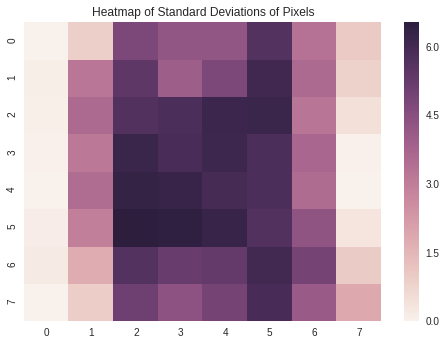

In [19]:
# 3.   
stdevs = digits_frame.describe().loc["std"].values
stdevs = np.reshape(a=stdevs, newshape=(8,8))
sns.heatmap(stdevs)
plt.title("Heatmap of Standard Deviations of Pixels")
plt.show()

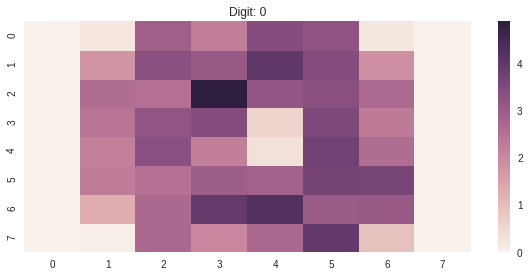

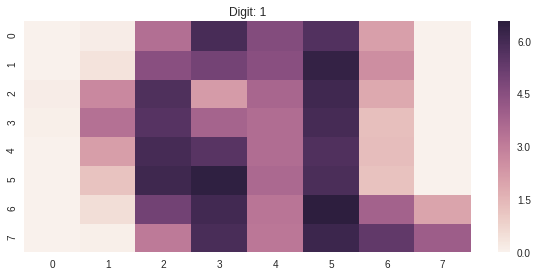

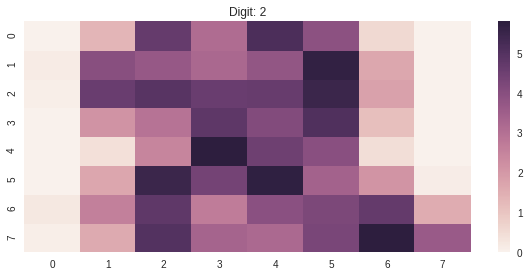

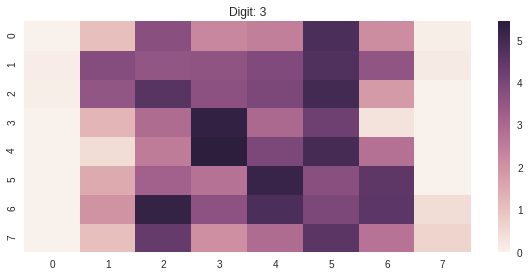

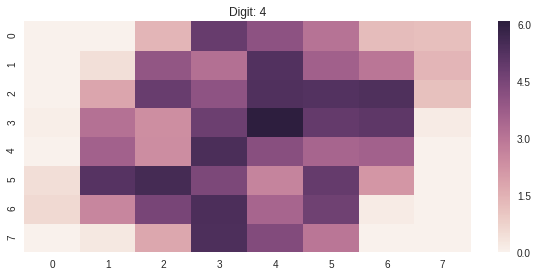

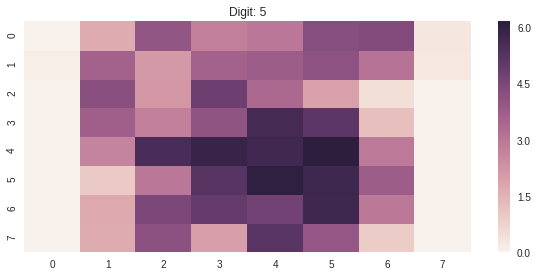

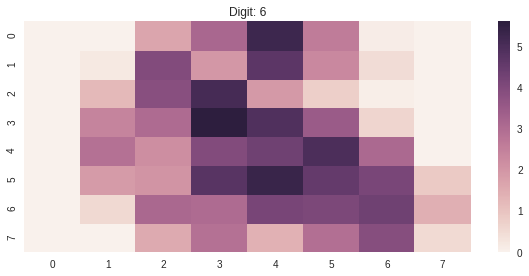

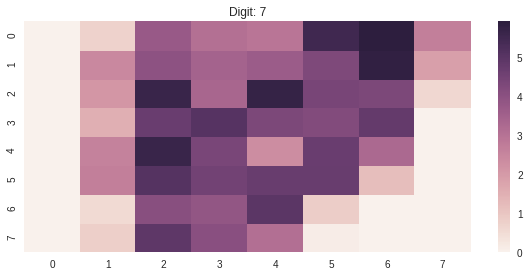

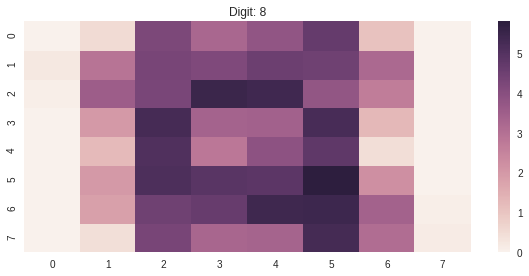

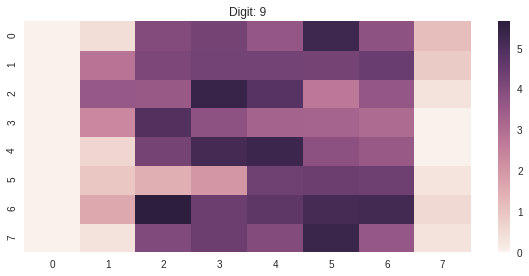

In [21]:
# 3. Bonus
groupbyFrame = digits_frame.groupby(digits.target).describe()
#f, ax = plt.subplots(figsize=(7,40))

#print (groupbyFrame.loc[groupbyFrame['std']])
for i in range (10):
    #plottingMatrix = groupbyFrame.loc[i].loc['std'].values
    templist = []
    for j in range(64):
        templist.append(groupbyFrame.loc[i][j]["std"])
    plottingMatrix = np.array(templist)
    plottingMatrix = np.reshape(a=plottingMatrix, newshape=(8,8))
    fig, ax = plt.subplots(figsize=(10, 50))
    plt.subplot(10,1,i+1)
    plt.title("Digit: {}".format(i))
    sns.heatmap(plottingMatrix)

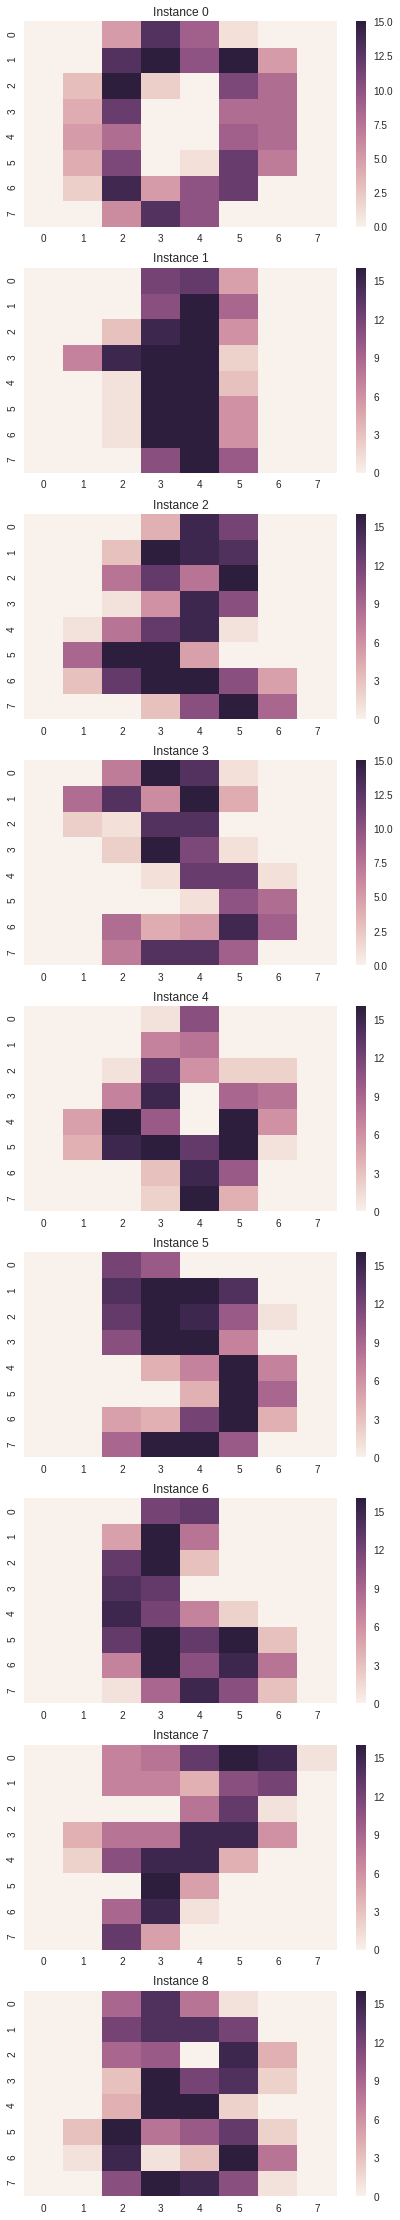

In [22]:
# 4.   
f, ax = plt.subplots(figsize=(7,40))
for i in range (9):
    plottingMatrix = digits_frame.iloc[i].values
    plottingMatrix = np.reshape(a=plottingMatrix, newshape=(8,8))
    plt.subplot(9,1,i+1)
    plt.title("Instance {}".format(i))
    sns.heatmap(plottingMatrix)

*Your answer goes here*
The standard deviation heatmaps in part 3 of Q 2.1 convey how important pixels are in classifing digits. If we look at the corners and the pixels in the right column we notice that these are almost always white (i.e., standard deviation of zero) suggesting that these dimensions will not be as helpful for modelling as the several pixels closer to the middle of the heatmap which show lots of variance.

### ========== Question 2.2 ==========

Create a new `PCA` object with `n_components = digits.data.shape[1]`. Plot the explained variance **ratio** against the number of components. You may find [this example](http://scikit-learn.org/stable/auto_examples/plot_digits_pipe.html#sphx-glr-auto-examples-plot-digits-pipe-py) quite handy...

Find the point where 95% of the variance has been explained. Use `plt.vlines()` to add a dotted verical line to the graph at that point and use `plt.annotate()` to label the number of eigenvectors used to explain that variance.

Below the plot, explain what you observe. What does this suggest about the data?

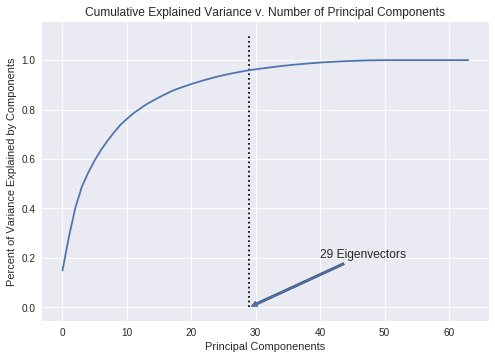

In [23]:
# Your code goes here
pca = PCA(n_components=digits.data.shape[1]).fit(digits.data)
explainedRatio = 0  # Total Variance Explained in Ratio form
ninetyFivePercent = 0  # Num of PCs that explain 95% of variance
ratioList = []
for i in range (len(pca.explained_variance_ratio_)):
    explainedRatio += pca.explained_variance_ratio_[i]
    ratioList.append(explainedRatio)
    if (ninetyFivePercent == 0 and explainedRatio > .95):
        ninetyFivePercent = i+1
plt.plot(ratioList)
plt.vlines(x=ninetyFivePercent, ymin=0, ymax=1.1, linestyles="dotted")
plt.title("Cumulative Explained Variance v. Number of Principal Components")
plt.xlabel("Principal Componenents")
plt.ylabel("Percent of Variance Explained by Components")
plt.annotate(s="29 Eigenvectors", xy=[29,0], xytext=[40,.2], arrowprops={"arrowstyle":"simple"})
plt.show()

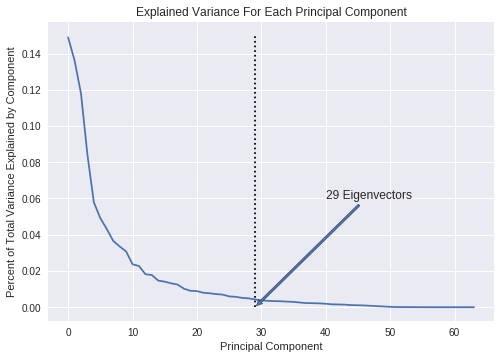

In [24]:
# Wasn't sure exactly which curve you wanted so here's another one
plt.plot(pca.explained_variance_ratio_)
plt.title("Explained Variance For Each Principal Component")
plt.xlabel("Principal Component")
plt.ylabel("Percent of Total Variance Explained by Component")
plt.vlines(x=ninetyFivePercent, ymin=0, ymax =.15, linestyles="dotted")
plt.annotate(s="29 Eigenvectors", xy=[29,0], xytext=[40,.06], arrowprops={"arrowstyle":"simple"})
plt.show()

*Your answer goes here*
To explain 95% (most) of the variance we only need less than half (29 of 64) of the original dimensions. This suggests that many of the attributes do not contribute much gain to classification of the digits. Intuitively this makes sense because the corner pixels in the bitmaps are almost guaranteed to not be shaded for every digit but the pixels near the middle of the bitmaps may or may not be shaded based on the digit.

### ========== Question 2.3 ==========

You will find the eigenvectors stored within `pca.components_`. Reuse your code from Question 2.1 and plot the first 9 principal components (PCs). Below, plot `pca.mean_`. 

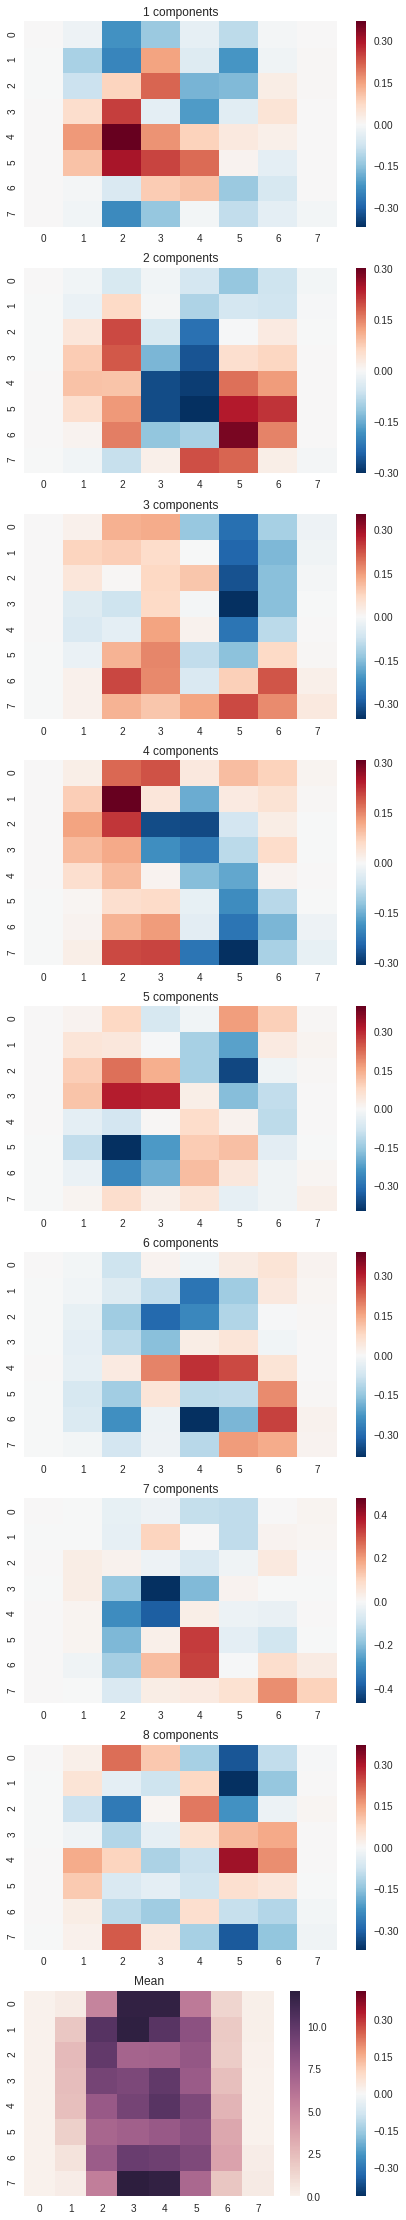

In [25]:
# Your code goes here
f, ax = plt.subplots(figsize=(7,40))
for i in range (9):
    plottingMatrix = pca.components_[i]
    plottingMatrix = np.reshape(a=plottingMatrix, newshape=(8,8))
    plt.subplot(9,1,i+1)
    plt.title("{} components".format(i+1))
    sns.heatmap(plottingMatrix)

plottingMatrix = pca.mean_
plottingMatrix = np.reshape(a=plottingMatrix, newshape=(8,8))
sns.heatmap(plottingMatrix)
plt.title("Mean")
plt.show()

### ========== Question 2.4 ==========

Now we want to make clear how these eigenvectors and the mean are used to approximate the data. `pca.transform(digits.data[idx,:].reshape(1, -1)).flatten()` will transform the digit in row `idx` into pca space. Another way to think about this is that it will give you the coefficents to multiply each eigenvector by and to add to the mean digit such that you can reconstruct the digit.

For the digit with idx = 0 (which should itself be a zero), create 4 plots:
1. The original digit
1. The digit reconstructed using 1 principal component
1. The digit reconstructed using 2 principal components
1. The digit reconstructed using 5 principal components

In the plot titles show:
1. the number of principal components used
1. the percentage of variance explained by that number of principal components
1. the coefficients of each principal component rounded to nearest integer (tip, convert to integers to reduce print space), i.e. the PCA space vector.

Below the plots, comment on the result. Do the eigenvectors produce realistic data?

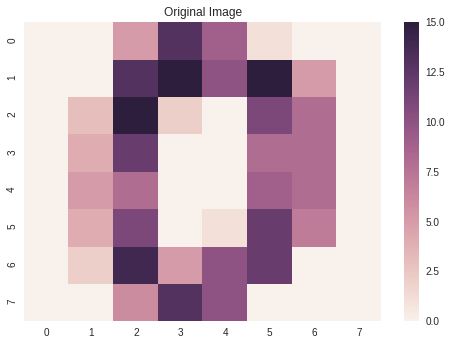

In [26]:
# Your code goes here
# 1.
plottingMatrix = digits_frame.iloc[0].values
plottingMatrix = np.reshape(a=plottingMatrix, newshape=(8,8))
plt.title("Original Image")
sns.heatmap(plottingMatrix)
plt.show()

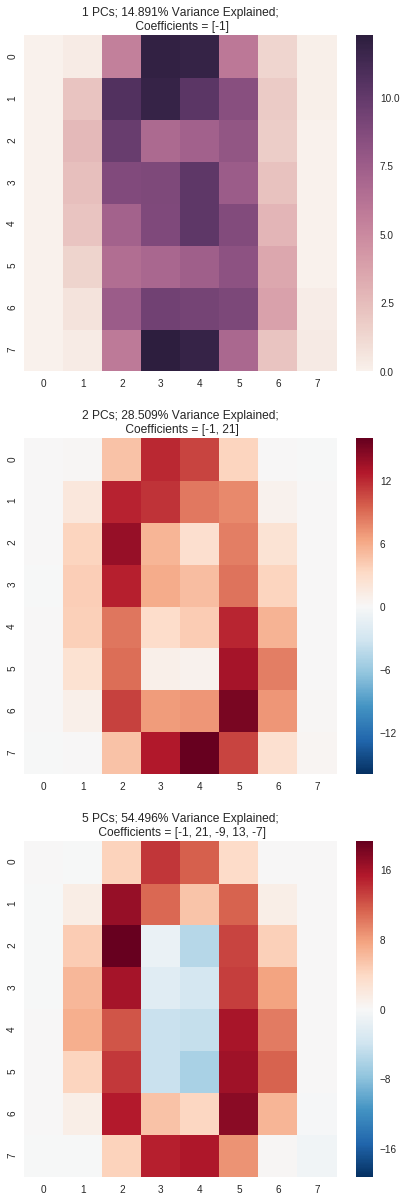

In [27]:
# 2., 3., 4. 
coefficients = pca.transform(digits.data[0,:].reshape(1, -1)).flatten()

coefficientsForPlotTitle = []  # Holds coefficients as integers
for elt in coefficients:
    coefficientsForPlotTitle.append(int(elt))
    
PCList = [1,2,5]
f, ax = plt.subplots(figsize=(7,21))
subplot = 1
for PCs in PCList:
    explainedVariance = 0
    newImage = pca.mean_
    for j in range(PCs):
        newImage += np.dot(coefficients[j], pca.components_[j])
        explainedVariance += 100 * pca.explained_variance_ratio_[j]
    plt.subplot(3,1,subplot)
    subplot += 1
    plottingMatrix = newImage
    plottingMatrix = np.reshape(a=plottingMatrix, newshape=(8,8))
    sns.heatmap(plottingMatrix)
    plt.title("{} PCs; {:.3f}% Variance Explained;\n Coefficients = {}".format(PCs, explainedVariance, coefficientsForPlotTitle[:PCs]))

*Your answer goes here*
The eigenvectors do produce reasonably realistic data. Perhaps by chance, the PCA reductions with 1 and 2 principal components more represent a standard zero (for example, they have more symmetry). As the number of principal components increase (e.g. 5 PCs) the heatmaps begin to closer resemble the original image even though the original image isn't necessarily a representative image of the most common zero. 

### ========== Question 2.5 ==========

**Challenge question** 

Fit 4 models:
1. SVC with a linear kernel, no shrinking, and a random_state on digit data
1. SVC with a linear kernel, no shrinking, and the same random_state on pca transformed digit data (use the full 64 component pca above)
1. Gaussian Naive Bayes Classifier on digit data
1. Gaussian Naive Bayes Classifier on pca transformed digit data (use the full 64 component pca above)

Use 5 fold cross validation and take the mean fold score as the result. Plot or print the results.

Below the code, explain why one classifier improved but the other did not!

In [28]:
# Your code goes here
transformed_data = PCA(n_components=digits.data.shape[1]).fit_transform(digits.data)
svc_not_transformed = SVC(kernel="linear", random_state=1, shrinking=False)
svc_transformed = SVC(kernel="linear", random_state=1, shrinking=False)
gnb_not_transformed = GaussianNB()
gnb_transformed = GaussianNB()

kf = KFold(n=digits.data.shape[0], n_folds=5, shuffle=True, random_state=1)
iteration = 1
for classifier in [svc_not_transformed, svc_transformed, gnb_not_transformed, gnb_transformed]:
    scores = 0
    for kf_train_indices, kf_test_indices in kf:
        if iteration == 1 or iteration == 3:
            kfclassifier = classifier.fit(X=digits.data[kf_train_indices], y=digits.target[kf_train_indices])
            scores += kfclassifier.score(X=digits.data[kf_test_indices], y=digits.target[kf_test_indices])
        else:
            kfclassifier = classifier.fit(X=transformed_data[kf_train_indices], y=digits.target[kf_train_indices])
            scores += kfclassifier.score(X=transformed_data[kf_test_indices], y=digits.target[kf_test_indices])
    if iteration == 1:
        print ("Score for Non_Transformed SVC: {}".format(scores/5))
    elif iteration == 2:
        print ("Score for Transformed SVC: {}".format(scores/5))
    elif iteration == 3:
        print ("Score for Non_Transformed Gaussian NB: {}".format(scores/5))
    else:
        print ("Score for Transformed Gaussian NB: {}".format(scores/5))
    iteration += 1

Score for Non_Transformed SVC: 0.9805277004023522
Score for Transformed SVC: 0.9805277004023522
Score for Non_Transformed Gaussian NB: 0.8391844630145465
Score for Transformed Gaussian NB: 0.8920489012689569


*Your answer goes here*
The SVC classifier did not improve. This is because SVC simply draws a decision boundary based on the orientation of the data points. The transformed data with all 64 principal components rotates the data space but does not reduce the dimensions. This means that the linear SVC classifier can just rotate the decision boundary the same amount as the axes were rotated, resulting in the same decision boundary with respect to the data and consequently an identical classification.

The Gaussian Naive Bayes classifier improved substantially. This is because the Gaussian Naive Bayes model assumes that all attributes are independent of one another. Thinking about digit bitmaps, this is obviously not the case; the fact that digits are usually drawn in one stroke means that the shading of one pixel implies similar shading in adjacent pixels. However, PCA removes much of this dependence so the assumptions on which the Guassian Naive Bayes model is based become more valid.